## Q1.1) Quais tipos de produto a UF mais vende com o passar dos meses?

**Dataset:** NFe do Distrito Federal com NCM!='-1' de 2022

### Importação de Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from classes import Preprocessing


### Leitura de Dados

In [2]:
raw_df_ufe = pd.read_csv('data/processed_nfe/nfe_ufe_df.csv')

print(raw_df_ufe.columns)

Index(['CHAVE DE ACESSO', 'MODELO', 'SÉRIE', 'NÚMERO', 'NATUREZA DA OPERAÇÃO',
       'DATA EMISSÃO', 'EVENTO MAIS RECENTE', 'DATA/HORA EVENTO MAIS RECENTE',
       'CPF/CNPJ Emitente', 'RAZÃO SOCIAL EMITENTE',
       'INSCRIÇÃO ESTADUAL EMITENTE', 'UF EMITENTE', 'MUNICÍPIO EMITENTE',
       'CNPJ DESTINATÁRIO', 'NOME DESTINATÁRIO', 'UF DESTINATÁRIO',
       'INDICADOR IE DESTINATÁRIO', 'DESTINO DA OPERAÇÃO', 'CONSUMIDOR FINAL',
       'PRESENÇA DO COMPRADOR', 'VALOR NOTA FISCAL', 'NÚMERO PRODUTO',
       'DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH',
       'NCM/SH (TIPO DE PRODUTO)', 'CFOP', 'QUANTIDADE', 'UNIDADE',
       'VALOR UNITÁRIO', 'VALOR TOTAL', 'ANO MES'],
      dtype='object')


/tmp/ipykernel_21301/3375952160.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df_ufe = pd.read_csv('data/processed_nfe/nfe_ufe_df.csv')


### Pré-processamento

Tipagem e filtro por NFEs com autorização de uso

In [3]:
df_ufe = Preprocessing.define_types(raw_df_ufe)
df_ufe = Preprocessing.filter_event_authorized(df_ufe)

Filtrando por 10 NCMs mais comuns

In [4]:
df_ufe['CATEGORIA NCM'] = df_ufe['CÓDIGO NCM/SH'].astype(str).str[0] + df_ufe['CÓDIGO NCM/SH'].astype(str).str[1]
df_ufe = df_ufe[['CATEGORIA NCM','NCM/SH (TIPO DE PRODUTO)','DATA EMISSÃO ANO','DATA EMISSÃO MES','INDICADOR IE DESTINATÁRIO']]

/tmp/ipykernel_21301/3041070882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ufe['CATEGORIA NCM'] = df_ufe['CÓDIGO NCM/SH'].astype(str).str[0] + df_ufe['CÓDIGO NCM/SH'].astype(str).str[1]


In [5]:
most_common_ncm = df_ufe['CATEGORIA NCM'].value_counts().head(10).index.tolist()

most_common_ncm

['84', '30', '85', '90', '39', '38', '40', '21', '73', '87']

In [6]:
df_ufe = df_ufe[df_ufe['CATEGORIA NCM'].isin(most_common_ncm)]

### Plotar gráfico de NFe por mês

In [7]:
df_plot = df_ufe.groupby(['CATEGORIA NCM','DATA EMISSÃO MES']).size().reset_index(name='Quantidade de NFEs')
df_plot.rename(columns={'CATEGORIA NCM':'NCM','DATA EMISSÃO MES':'Mês de Emissão'}, inplace=True)
df_plot = df_plot[['NCM','Mês de Emissão','Quantidade de NFEs']]

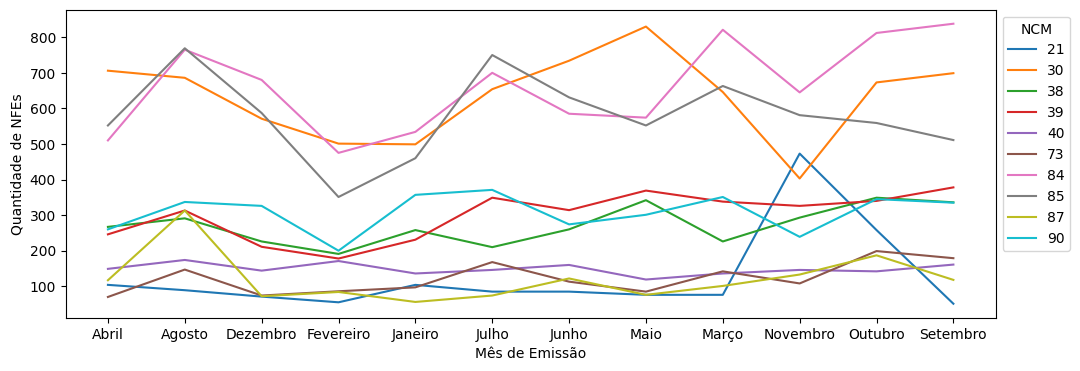

In [8]:
plt.figure(figsize=(12,4))
ax = sns.lineplot(data=df_plot, x='Mês de Emissão', y="Quantidade de NFEs", hue="NCM")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

- NCM 90: Instrumentos e aparelhos de óptica, de fotografia, de cinematografia, de medida, de controle ou de precisão; instrumentos e aparelhos médico-cirúrgicos; suas partes e acessórios.
- NCM 84: Reatores nucleares, caldeiras, máquinas, aparelhos e instrumentos mecânicos, e suas partes.  
- NCM 49: Livros, jornais, gravuras e outros produtos das indústrias gráficas; textos manuscritos ou datilografados, planos e plantas.  
- NCM 85: Máquinas, aparelhos e materiais elétricos, e suas partes; aparelhos de gravação ou de reprodução de som, aparelhos de gravação ou de reprodução de imagens e de som em televisão, e suas partes e acessórios.
- NCM 30: Produtos farmacêuticos.
- NCM 70: Vidro e suas obras.
- NCM 39: Plástico e suas obras.
- NCM 38: Produtos diversos das indústrias químicas.   
- NCM 87: Veículos automóveis, tratores, ciclos e outros veículos terrestres, suas partes e acessórios.   
- NCM 20: Preparações de produtos hortícolas, fruta ou de outras partes de plantas. 

Significados atualizados de 01/01/2022.

In [11]:
df_ncm = df_ufe[(df_ufe['DATA EMISSÃO MES'] == 'Junho') & (df_ufe['CATEGORIA NCM'] == '49')]
df_ncm['Descrição do NCM'].value_counts()

KeyError: 'Descrição do NCM'